In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('20%_samp_cleaned.csv', index_col=0)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 774872 entries, 0 to 1091289
Data columns (total 14 columns):
Call Type                               774872 non-null object
Received DtTm                           774872 non-null object
Original Priority                       774872 non-null object
ALS Unit                                774872 non-null int64
Unit Type                               774872 non-null object
Unit sequence in call dispatch          774872 non-null float64
Neighborhooods - Analysis Boundaries    774872 non-null object
call_to_disp                            774872 non-null float64
disp_to_resp                            774872 non-null float64
resp_to_scene                           774872 non-null float64
Call Year                               774872 non-null int64
Call Month                              774872 non-null int64
Call DoW                                774872 non-null int64
Call ToD                                774872 non-null int64
dtypes:

In [4]:
df.drop(labels='Received DtTm', axis=1, inplace = True)

## Convert Categorical Data into Numeric

### Call Type

In [5]:
Call_Type_dict = {}
for i, j in enumerate(df['Call Type'].unique()):
    Call_Type_dict[j] = i
    

In [6]:
Call_Type_dict

{'Medical Incident': 0,
 'Other': 1,
 'Alarms': 2,
 'Traffic Collision': 3,
 'Structure Fire': 4,
 'Outside Fire': 5,
 'Citizen Assist / Service Call': 6}

In [7]:
df['Call Type'] = df['Call Type'].apply(lambda x: int(Call_Type_dict[x]))

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 774872 entries, 0 to 1091289
Data columns (total 13 columns):
Call Type                               774872 non-null int64
Original Priority                       774872 non-null object
ALS Unit                                774872 non-null int64
Unit Type                               774872 non-null object
Unit sequence in call dispatch          774872 non-null float64
Neighborhooods - Analysis Boundaries    774872 non-null object
call_to_disp                            774872 non-null float64
disp_to_resp                            774872 non-null float64
resp_to_scene                           774872 non-null float64
Call Year                               774872 non-null int64
Call Month                              774872 non-null int64
Call DoW                                774872 non-null int64
Call ToD                                774872 non-null int64
dtypes: float64(4), int64(6), object(3)
memory usage: 82.8+ MB


### Original Priority

In [9]:
df['Original Priority'].unique()

array(['3', '2', 'A', 'B', 'C', 'E', '1'], dtype=object)

In [10]:
Orig_Prior_dict = {}
for i, j in enumerate(df['Original Priority'].unique()):
    Orig_Prior_dict[j] = i
    
print(Orig_Prior_dict)


{'3': 0, '2': 1, 'A': 2, 'B': 3, 'C': 4, 'E': 5, '1': 6}


In [11]:
df['Original Priority'] = df['Original Priority'].apply(lambda x: int(Orig_Prior_dict[x]))

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 774872 entries, 0 to 1091289
Data columns (total 13 columns):
Call Type                               774872 non-null int64
Original Priority                       774872 non-null int64
ALS Unit                                774872 non-null int64
Unit Type                               774872 non-null object
Unit sequence in call dispatch          774872 non-null float64
Neighborhooods - Analysis Boundaries    774872 non-null object
call_to_disp                            774872 non-null float64
disp_to_resp                            774872 non-null float64
resp_to_scene                           774872 non-null float64
Call Year                               774872 non-null int64
Call Month                              774872 non-null int64
Call DoW                                774872 non-null int64
Call ToD                                774872 non-null int64
dtypes: float64(4), int64(7), object(2)
memory usage: 82.8+ MB


### Unit Type

In [13]:
df['Unit Type'].unique()

array(['MEDIC', 'PRIVATE', 'TRUCK', 'ENGINE', 'CHIEF', 'RESCUE CAPTAIN',
       'SUPPORT', 'RESCUE SQUAD', 'INVESTIGATION', 'AIRPORT'],
      dtype=object)

In [14]:
Unit_Type_dict = {}
for i, j in enumerate(df['Unit Type'].unique()):
    Unit_Type_dict[j] = i
    
print(Unit_Type_dict)

{'MEDIC': 0, 'PRIVATE': 1, 'TRUCK': 2, 'ENGINE': 3, 'CHIEF': 4, 'RESCUE CAPTAIN': 5, 'SUPPORT': 6, 'RESCUE SQUAD': 7, 'INVESTIGATION': 8, 'AIRPORT': 9}


In [15]:
df['Unit Type'] = df['Unit Type'].apply(lambda x: int(Unit_Type_dict[x]))

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 774872 entries, 0 to 1091289
Data columns (total 13 columns):
Call Type                               774872 non-null int64
Original Priority                       774872 non-null int64
ALS Unit                                774872 non-null int64
Unit Type                               774872 non-null int64
Unit sequence in call dispatch          774872 non-null float64
Neighborhooods - Analysis Boundaries    774872 non-null object
call_to_disp                            774872 non-null float64
disp_to_resp                            774872 non-null float64
resp_to_scene                           774872 non-null float64
Call Year                               774872 non-null int64
Call Month                              774872 non-null int64
Call DoW                                774872 non-null int64
Call ToD                                774872 non-null int64
dtypes: float64(4), int64(8), object(1)
memory usage: 82.8+ MB


In [17]:
df['Unit sequence in call dispatch'] = df['Unit sequence in call dispatch'].astype('int64')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 774872 entries, 0 to 1091289
Data columns (total 13 columns):
Call Type                               774872 non-null int64
Original Priority                       774872 non-null int64
ALS Unit                                774872 non-null int64
Unit Type                               774872 non-null int64
Unit sequence in call dispatch          774872 non-null int64
Neighborhooods - Analysis Boundaries    774872 non-null object
call_to_disp                            774872 non-null float64
disp_to_resp                            774872 non-null float64
resp_to_scene                           774872 non-null float64
Call Year                               774872 non-null int64
Call Month                              774872 non-null int64
Call DoW                                774872 non-null int64
Call ToD                                774872 non-null int64
dtypes: float64(3), int64(9), object(1)
memory usage: 82.8+ MB


### Neighborhooods - Analysis Boundaries

In [19]:
df['Neighborhooods - Analysis Boundaries'].unique()

array(['Tenderloin', 'Sunset/Parkside', 'South of Market',
       'Financial District/South Beach', 'Lakeshore', 'Russian Hill',
       'West of Twin Peaks', 'Western Addition', 'Outer Richmond',
       'Mission', 'Bayview Hunters Point', 'Treasure Island',
       'Bernal Heights', 'Outer Mission', 'Marina', 'Excelsior',
       'Mission Bay', 'Lone Mountain/USF', 'Pacific Heights',
       'Visitacion Valley', 'Nob Hill', 'Chinatown', 'Hayes Valley',
       'Inner Richmond', 'Castro/Upper Market',
       'Oceanview/Merced/Ingleside', 'North Beach', 'Presidio Heights',
       'Haight Ashbury', 'Inner Sunset', 'Portola', 'Noe Valley',
       'Golden Gate Park', 'Glen Park', 'Potrero Hill', 'None',
       'Seacliff', 'Twin Peaks', 'Japantown', 'Presidio', 'McLaren Park',
       'Lincoln Park'], dtype=object)

In [20]:
Neigh_dict = {}
for i, j in enumerate(df['Neighborhooods - Analysis Boundaries'].unique()):
    Neigh_dict[j] = i

print(Neigh_dict)

{'Tenderloin': 0, 'Sunset/Parkside': 1, 'South of Market': 2, 'Financial District/South Beach': 3, 'Lakeshore': 4, 'Russian Hill': 5, 'West of Twin Peaks': 6, 'Western Addition': 7, 'Outer Richmond': 8, 'Mission': 9, 'Bayview Hunters Point': 10, 'Treasure Island': 11, 'Bernal Heights': 12, 'Outer Mission': 13, 'Marina': 14, 'Excelsior': 15, 'Mission Bay': 16, 'Lone Mountain/USF': 17, 'Pacific Heights': 18, 'Visitacion Valley': 19, 'Nob Hill': 20, 'Chinatown': 21, 'Hayes Valley': 22, 'Inner Richmond': 23, 'Castro/Upper Market': 24, 'Oceanview/Merced/Ingleside': 25, 'North Beach': 26, 'Presidio Heights': 27, 'Haight Ashbury': 28, 'Inner Sunset': 29, 'Portola': 30, 'Noe Valley': 31, 'Golden Gate Park': 32, 'Glen Park': 33, 'Potrero Hill': 34, 'None': 35, 'Seacliff': 36, 'Twin Peaks': 37, 'Japantown': 38, 'Presidio': 39, 'McLaren Park': 40, 'Lincoln Park': 41}


In [21]:
df['Neighborhooods - Analysis Boundaries'] = df['Neighborhooods - Analysis Boundaries'].apply(lambda x:
                                                                                              int(Neigh_dict[x]))

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 774872 entries, 0 to 1091289
Data columns (total 13 columns):
Call Type                               774872 non-null int64
Original Priority                       774872 non-null int64
ALS Unit                                774872 non-null int64
Unit Type                               774872 non-null int64
Unit sequence in call dispatch          774872 non-null int64
Neighborhooods - Analysis Boundaries    774872 non-null int64
call_to_disp                            774872 non-null float64
disp_to_resp                            774872 non-null float64
resp_to_scene                           774872 non-null float64
Call Year                               774872 non-null int64
Call Month                              774872 non-null int64
Call DoW                                774872 non-null int64
Call ToD                                774872 non-null int64
dtypes: float64(3), int64(10)
memory usage: 82.8 MB


## train/test split

In [23]:
X = df.drop(labels=['call_to_disp','disp_to_resp','resp_to_scene'], axis=1)
y = df[['call_to_disp','disp_to_resp','resp_to_scene']]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [25]:
len(df)

774872

## call_to_disp

### Basic random forest as baseline

In [25]:
#start out with a basic one to see how it performs

In [26]:
model = RandomForestRegressor(n_estimators = 50, oob_score=True)

In [27]:
model.fit(X_train, y_train['call_to_disp'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=True, random_state=None, verbose=0,
                      warm_start=False)

In [28]:
model.oob_score_

0.03415932884191819

## disp_to_resp - baseline

In [29]:
model = RandomForestRegressor(n_estimators = 50, oob_score=True)

In [30]:
model.fit(X_train, y_train['disp_to_resp'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=True, random_state=None, verbose=0,
                      warm_start=False)

In [31]:
model.oob_score_

0.20152532892895414

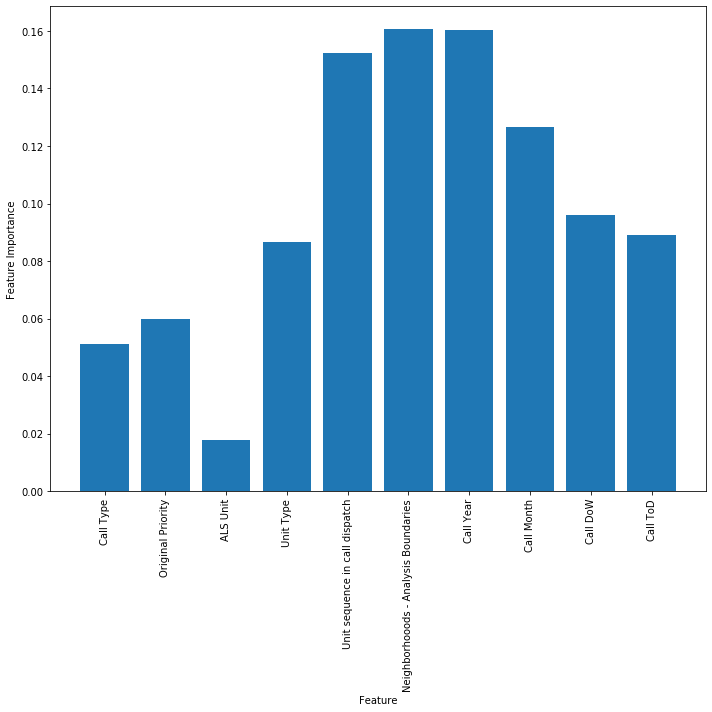

In [32]:
plt.figure(figsize=(10,10))
plt.bar(range(len(X.columns)), model.feature_importances_)
plt.xticks(ticks=range(len(X.columns)), labels = X.columns, rotation='vertical')
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.tight_layout()

## resp_to_scene - baseline

In [33]:
model = RandomForestRegressor(n_estimators = 50, oob_score=True)

In [34]:
model.fit(X_train, y_train['resp_to_scene'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=True, random_state=None, verbose=0,
                      warm_start=False)

In [35]:
model.oob_score_

0.2739678454682918

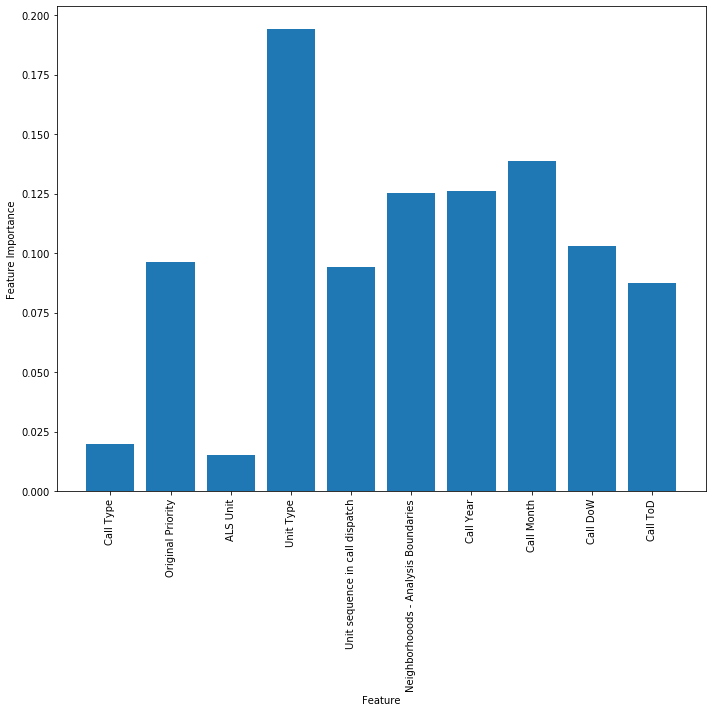

In [36]:
plt.figure(figsize=(10,10))
plt.bar(range(len(X.columns)), model.feature_importances_)
plt.xticks(ticks=range(len(X.columns)), labels = X.columns, rotation='vertical')
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.tight_layout()

## disp_to_resp Grid Search

In [35]:
grid_param = {
    'n_estimators': [50, 100, 200],
    'criterion': ['mae','mse']
    }

In [36]:
GS = GridSearchCV(RandomForestRegressor(), grid_param)

In [37]:
GS.fit(X_train, y_train['disp_to_resp'])

/home/christopher/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None, param_grid={'n_estimators': [50, 100]},
           

In [ ]:
from sklearn.externals.joblib import parallel_backend
with parallel_backend('threading'):
    GS.fit(X_train, y_train['disp_to_resp'])

/home/christopher/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [39]:
GS.best_score_

0.2344501001384551